In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

import time

In [3]:
cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']

In [5]:
cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

In [7]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1296
1296
432
432


In [8]:
target.value_counts()

4    1210
3     384
2      69
1      65
Name: class, dtype: int64

In [9]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
from sklearn import svm
from sklearn.svm import SVC
svm_l = svm.SVC(kernel='linear')

<Figure size 432x288 with 0 Axes>

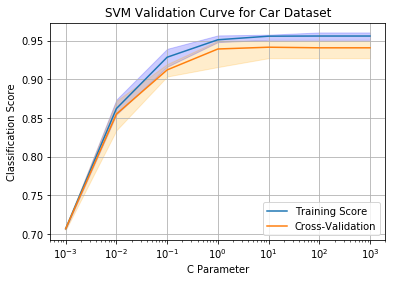

<Figure size 432x288 with 0 Axes>

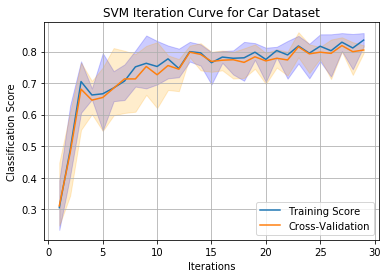

In [15]:

# C_range = np.logspace(-3, 3, 7)
# train_scores, test_scores = validation_curve(svm_linear, X_train_std, Y_train, param_name="C", param_range=C_range, cv=5, n_jobs=-1)

# plt.figure()
# plt.semilogx(C_range, np.mean(train_scores, axis=1), label='Training score')
# plt.semilogx(C_range, np.mean(test_scores, axis=1), label='Cross-validation score')
# plt.title('Validation curve for SVM (linear kernel) on Car Data')
# plt.xlabel('C')
# plt.ylabel("Classification score")
# plt.legend(loc="best")
# plt.grid()
# #plt.savefig(fig_path + 'dt_validation_curve_1.png')
# plt.show()


plt.figure()
train_scores, test_scores = validation_curve(svm_l, X_train_std, Y_train, param_name="C", param_range=np.logspace(-3, 3, 7), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(np.logspace(-3, 3, 7), avg_train_score, label='Training Score')
plt.semilogx(np.logspace(-3, 3, 7), avg_test_score, label='Cross-Validation')

plt.fill_between(np.logspace(-3, 3, 7), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.logspace(-3, 3, 7), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SVM Validation Curve for Car Dataset')
plt.xlabel('C Parameter')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

# #iterations
# iter_range = np.arange(1,30, 1)
# train_scores, test_scores = validation_curve(svm_l, X_train_std, Y_train, param_name="max_iter", param_range=iter_range, 
#                                              cv=5, n_jobs=4)

# plt.figure()
# plt.plot(iter_range, np.mean(train_scores, axis=1), label='Training score')
# plt.plot(iter_range, np.mean(test_scores, axis=1), label='Cross-validation score')
# plt.title('SVM(linear) Iteration Curve on Car Dataset ')
# plt.xlabel('Iterations')
# plt.ylabel("Classification score")
# plt.legend(loc="best")
# plt.grid()
# #plt.savefig(fig_path + 'dt_validation_curve_2.png')
# plt.show()

plt.figure()
train_scores, test_scores = validation_curve(svm_l, X_train_std, Y_train, param_name="max_iter", param_range=np.arange(1,30, 1), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.plot(np.arange(1,30, 1), avg_train_score, label='Training Score')
plt.plot(np.arange(1,30, 1), avg_test_score, label='Cross-Validation')

plt.fill_between(np.arange(1,30, 1), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.arange(1,30, 1), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SVM Iteration Curve for Car Dataset')
plt.xlabel('Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

In [11]:
svm_rbf = svm.SVC(kernel='rbf')

Misclassified samples using SVM are: 12
Classification Accuracy of SVM is 0.97 


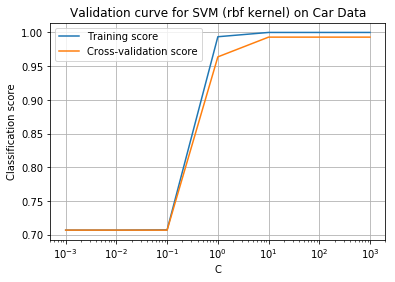

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=22).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/e

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=16).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=24).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs

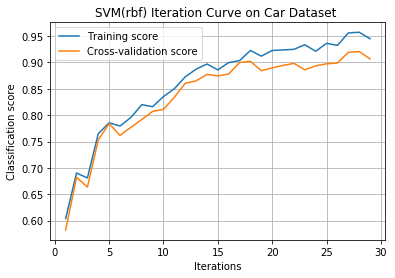

In [12]:

C_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(svm_rbf, X_train_std, Y_train, param_name="C", param_range=C_range, cv=5, n_jobs=-1)

plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for SVM (rbf kernel) on Car Data')
plt.xlabel('C')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

#iterations
iter_range = np.arange(1,30, 1)
train_scores, test_scores = validation_curve(svm_rbf, X_train_std, Y_train, param_name="max_iter", param_range=iter_range, 
                                             cv=5, n_jobs=4)

plt.figure()
plt.plot(iter_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(iter_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('SVM(rbf) Iteration Curve on Car Dataset ')
plt.xlabel('Iterations')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_2.png')
plt.show()

In [13]:
C_range = np.logspace(-2, 1, 10)
tuned_params = {'C' : C_range}
svm_linear = GridSearchCV(svm_linear, param_grid=tuned_params, cv=5, n_jobs=4)
t0 = time.time()
svm_linear.fit(X_train_std, Y_train)
t1 = time.time()
train_time[3] = t1 - t0
print('Completed training in %f seconds' % train_time[3])
best_clf_svm = svm_linear
best_params = svm_linear.best_params_
print("Best parameters set found on development set:")
print(best_params)
t0 = time.time()
y_pred = best_clf_svm.predict(X_test_std)
t1 = time.time()
test_time[3] = t1 - t0
print('Inference time on test data: %f seconds' % test_time[3])
best_accuracy[3] = accuracy_score(Y_test, y_pred)
print('Best accuracy with SVM (linear kernel) is %.2f%%' % (best_accuracy[3] * 100))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

Completed training in 0.778849 seconds
Best parameters set found on development set:
{'C': 4.6415888336127775}
Inference time on test data: 0.008039 seconds
Best accuracy with SVM (linear kernel) is 92.59%
[[ 17   2   1   0]
 [  1  14   0   0]
 [  1   9  81  12]
 [  0   0   6 288]]


/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWar

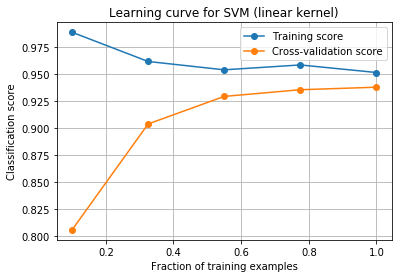

In [14]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train_std, Y_train, train_sizes=train_sizes, cv=5, n_jobs=4)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (linear kernel)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()

In [15]:
C_range = np.logspace(-2, 1, 10)
tuned_params = {'C' : C_range}
svm_linear = GridSearchCV(svm_rbf, param_grid=tuned_params, cv=5, n_jobs=4)
t0 = time.time()
svm_linear.fit(X_train_std, Y_train)
t1 = time.time()
train_time[3] = t1 - t0
print('Completed training in %f seconds' % train_time[3])
best_clf_svm = svm_linear
best_params = svm_linear.best_params_
print("Best parameters set found on development set:")
print(best_params)
t0 = time.time()
y_pred = best_clf_svm.predict(X_test_std)
t1 = time.time()
test_time[3] = t1 - t0
print('Inference time on test data: %f seconds' % test_time[3])
best_accuracy[3] = accuracy_score(Y_test, y_pred)
print('Best accuracy with SVM (rbf) is %.2f%%' % (best_accuracy[3] * 100))
print(confusion_matrix(Y_test, y_pred))

Completed training in 1.290521 seconds
Best parameters set found on development set:
{'C': 4.6415888336127775}
Inference time on test data: 0.007877 seconds
Best accuracy with SVM (rbf) is 97.22%
[[ 19   0   1   0]
 [  1  14   0   0]
 [  3   7  93   0]
 [  0   0   0 294]]


/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWar

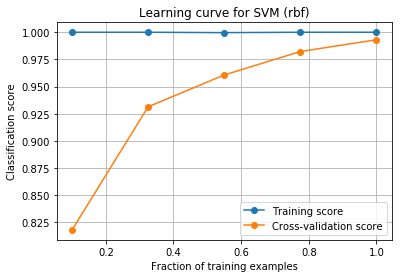

In [16]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train_std, Y_train, train_sizes=train_sizes, cv=5, n_jobs=4)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (rbf)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()